# Comparação de distribuição de dados de projetos culturais quando avaliados por segmento cultural e por produto cultural
---

Issues relacionadas ao estudo:
* [#221](https://github.com/lappis-unb/salic-ml/issues/221): Estudo sobre comparação de detecção de outlier por segmento vs produto

## Objetivos

Realizar um estudo onde será comparada a distribuição de dados de uma feature de projetos de um **produto cultural** e de projetos de um **segmento**. Nesta análise, será investigada se as distribuições mantém o mesmo padrão ou se elas são muito diferentes.

O estudo comparativo será visual e estatístico, ou seja, serão apresentados diversos gráficos das distribuições de dados para vários produtos culturais e segmentos, além disso, serão apresentadas várias medidas estátisticas para se fazer a comparação.

---
## Preparação

Serão gerados dois datasets: um contendo o valor total aprovado de todos os projetos, agrupados por seus respectivos **produtos culturais** e identificados por seu PRONAC; e um contendo o valor total aprovado de todos os projetos, agrupados por seus respectivos **segmentos** e identificados por seu PRONAC.

#### Importando módulos necessários

In [1]:
%pylab inline
import scipy
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


#### Carregando e mostrando dataset a ser utilizado ao longo do estudo

In [2]:
df = pd.read_csv('../../data/raw/planilha_orcamentaria.csv')
print(df.columns)
df.shape

Index(['idPronac', 'PRONAC', 'idPlanilhaAprovacao', 'Item', 'idPlanilhaItens',
       'Unidade', 'QtDias', 'QtItem', 'nrOcorrencia', 'VlUnitarioSolicitado',
       'VlTotalSolicitado', 'VlUnitarioAprovado', 'VlTotalAprovado', 'UfItem',
       'MunicipioItem', 'Etapa', 'idArea', 'Area', 'idSegmento', 'Segmento',
       'idProduto', 'Produto', 'DataProjeto', 'cdCidade', 'cdEtapa'],
      dtype='object')


(2026756, 25)

#### 1. Gerando tabela com o valor total de gastos aprovados dos projetos, agrupando-os por produto cultural

In [3]:
projects_by_product = df[['PRONAC', 'idProduto', 'VlTotalAprovado']]
projects_by_product = projects_by_product.groupby(['idProduto', 'PRONAC']).sum()
projects_by_product.head()

VlTotalAprovado
idProduto PRONAC                 
0         90105         309580.00
          90226          52047.00
          90335         219980.00
          90413          33648.16
          90722          26856.12

#### Visualizando principais produtos culturais

In [4]:
products = df[['idProduto', 'Produto', 'PRONAC']].drop_duplicates()
products = products.groupby(['idProduto', 'Produto']).count()
products = products.rename(columns={'PRONAC': 'numOccurrences'})
products = products.reset_index(level='Produto')
products = products.sort_values(by='numOccurrences', ascending=False)
print(products.shape)
products.head()

(75, 2)


,Produto,numOccurrences
idProduto,,
0,Administracao do Projeto,41568
19,Espetáculo de Artes Cênicas,10360
51,Apresentação Musical,8338
1,Livro,6476
18,Festival/Mostra,4944


#### 2. Gerando tabela com o valor total de gastos aprovados dos projetos, agrupando-os por segmento

In [5]:
projects_by_segment = df[['PRONAC', 'idSegmento', 'VlTotalAprovado']]
projects_by_segment = projects_by_segment.groupby(['idSegmento', 'PRONAC']).sum()
projects_by_segment.head()

VlTotalAprovado
idSegmento PRONAC                 
11         90105        5089380.00
           97310         506905.78
           98022         392956.00
           100855        788403.00
           102857        921745.00

#### Visualizando principais segmentos

In [6]:
segments = df[['idSegmento', 'Segmento', 'PRONAC']].drop_duplicates()
segments = segments.groupby(['idSegmento', 'Segmento']).count()
segments = segments.rename(columns={'PRONAC': 'numOccurrences'})
segments = segments.reset_index(level='Segmento')
segments = segments.sort_values(by='numOccurrences', ascending=False)
print(segments.shape)
segments.head()

(127, 2)


,Segmento,numOccurrences
idSegmento,,
11,Teatro,9793
31,Música Popular Cantada,4551
33,Música Instrumental,4338
4B,Exposição de Artes Visuais,2659
12,Dança,2415


---
## Desenvolvimento

Nesta etapa, analisaremos o valor total de gastos aprovado dos projetos dos principais produtos culturais e segmentos.

#### Visualização das distribuições para segmentos e produtos culturais

Segmento mean:5.67 std:0.73
Produto  mean:4.57 std:0.89


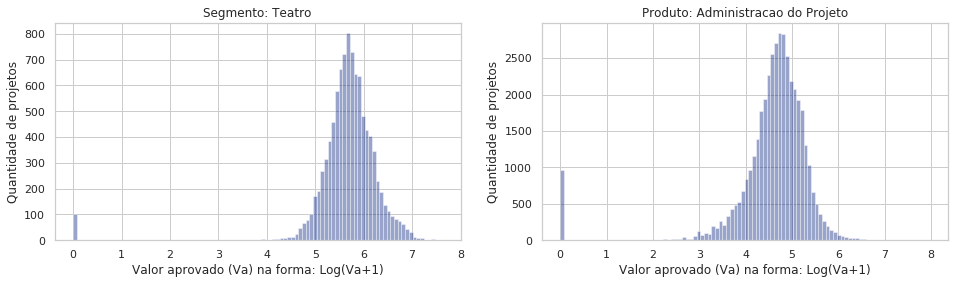

Segmento mean:5.60 std:0.81
Produto  mean:5.49 std:0.82


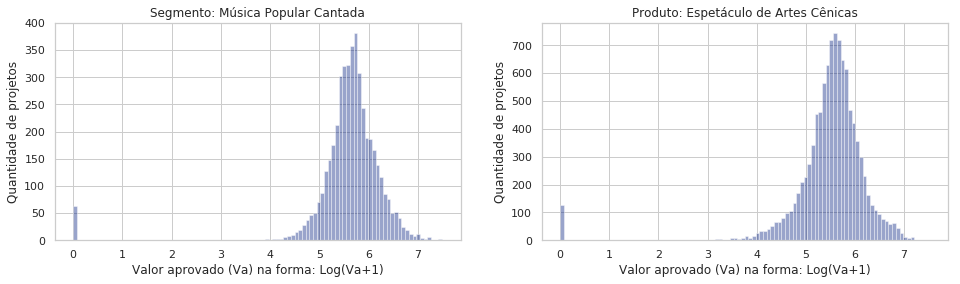

Segmento mean:5.63 std:0.63
Produto  mean:5.33 std:0.90


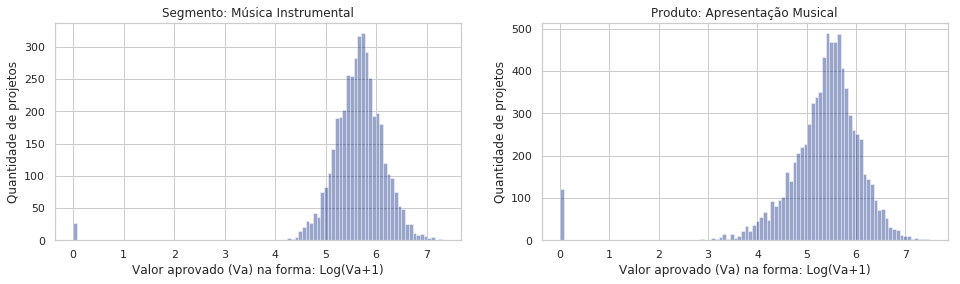

Segmento mean:5.64 std:1.10
Produto  mean:4.89 std:1.25


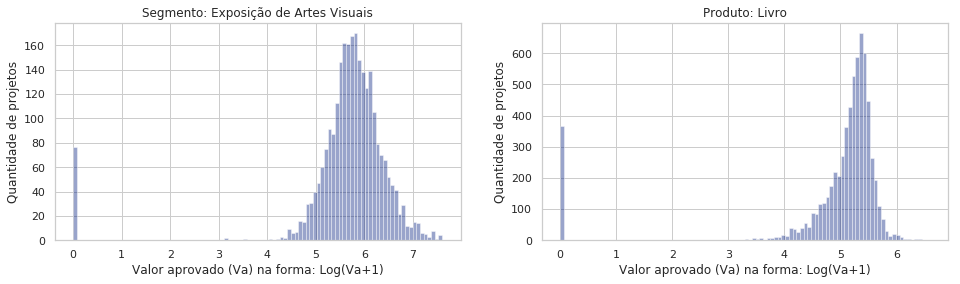

Segmento mean:5.55 std:0.76
Produto  mean:5.42 std:1.07


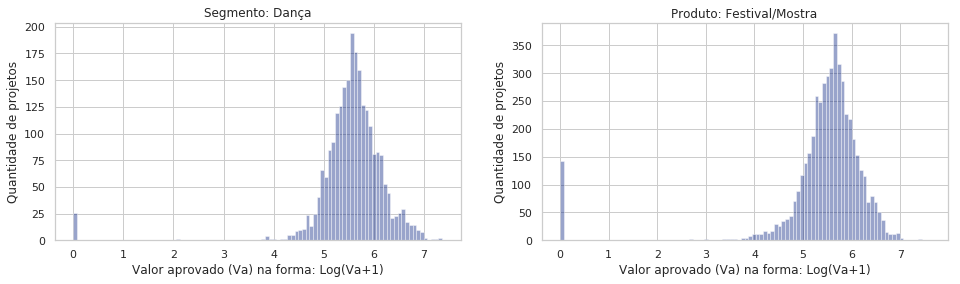

Segmento mean:5.65 std:0.74
Produto  mean:5.21 std:1.26


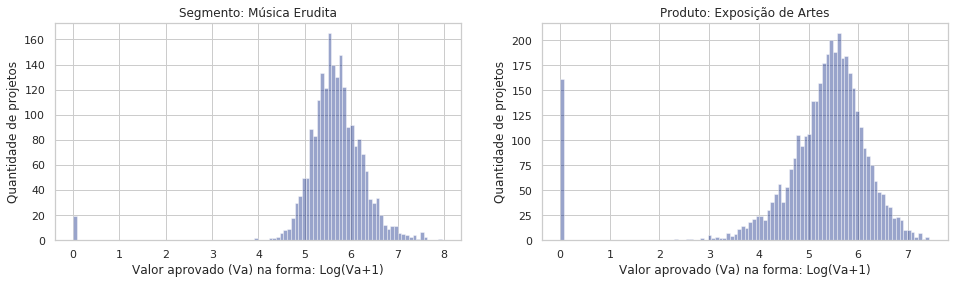

Segmento mean:5.32 std:0.73
Produto  mean:4.45 std:1.25


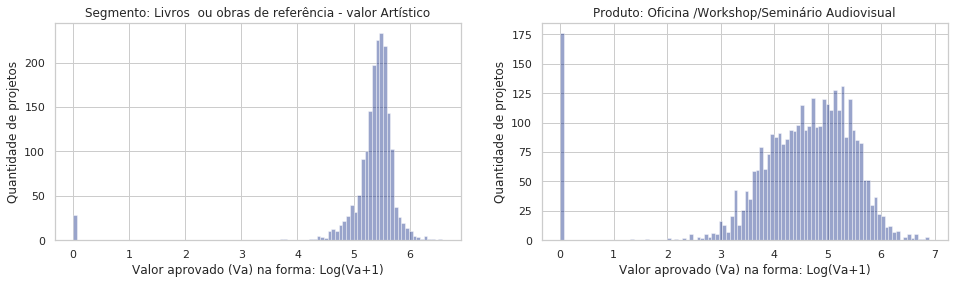

Segmento mean:5.22 std:0.96
Produto  mean:4.83 std:1.18


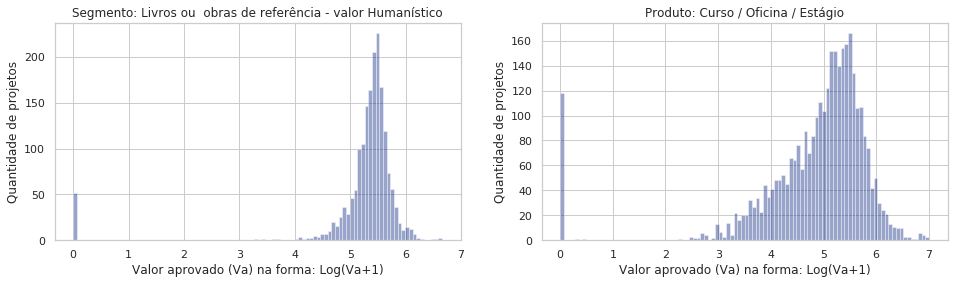

Segmento mean:5.66 std:0.75
Produto  mean:4.72 std:1.07


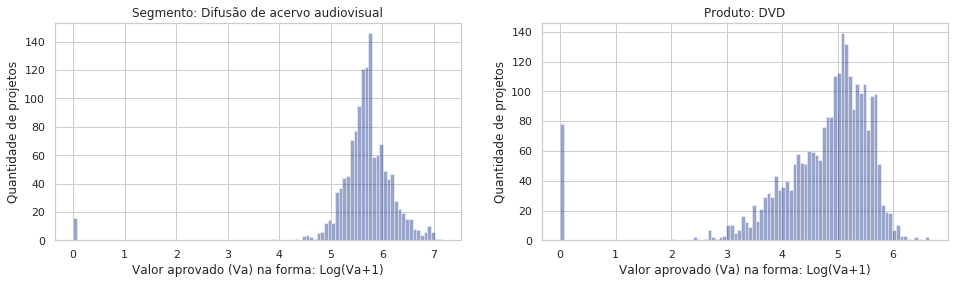

Segmento mean:5.39 std:1.02
Produto  mean:4.78 std:0.79


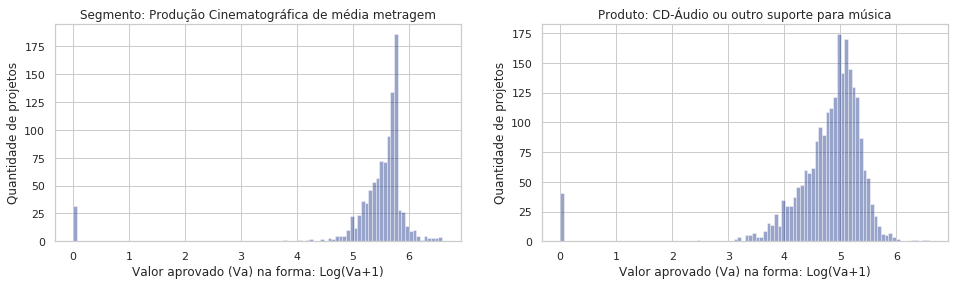

In [7]:
NUM_LINES = 10

for line in range(NUM_LINES):
    segment = segments.iloc[line]
    projects_segm = np.log10(1 + projects_by_segment.loc[segment.name]['VlTotalAprovado'])
    product = products.iloc[line]
    projects_prod = np.log10(1 + projects_by_product.loc[product.name]['VlTotalAprovado'])

    print('Segmento mean:%.2lf std:%.2lf' % (projects_segm.mean(), projects_segm.std()))
    print('Produto  mean:%.2lf std:%.2lf' % (projects_prod.mean(), projects_prod.std()))

    sns.set(style='whitegrid', palette='dark')
    f, ax = plt.subplots(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.distplot(projects_segm, bins=100, kde=False)
    plt.title('Segmento: ' + segment['Segmento'])
    plt.ylabel('Quantidade de projetos')
    plt.xlabel('Valor aprovado (Va) na forma: Log(Va+1)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.distplot(projects_prod, bins=100, kde=False)
    plt.title('Produto: ' + product['Produto'])
    plt.ylabel('Quantidade de projetos')
    plt.xlabel('Valor aprovado (Va) na forma: Log(Va+1)')
    plt.grid(True)
    plt.show()

#### Visualização das distribuições para segmentos e produtos culturais após a remoção de projetos com valor total aprovado igual a zero

Segmento mean:5.72 std:0.45
Produto  mean:4.67 std:0.55


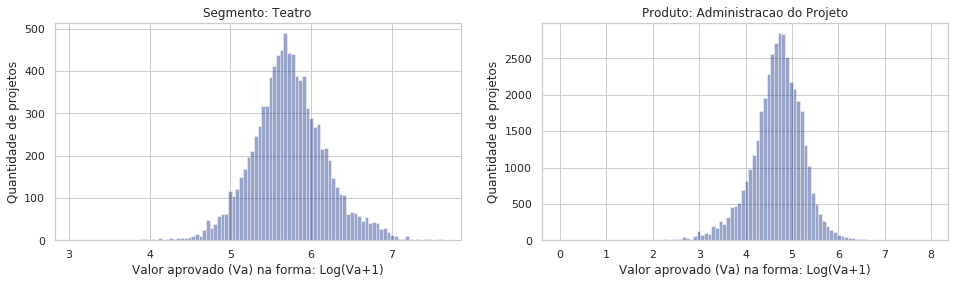

Segmento mean:5.68 std:0.46
Produto  mean:5.56 std:0.54


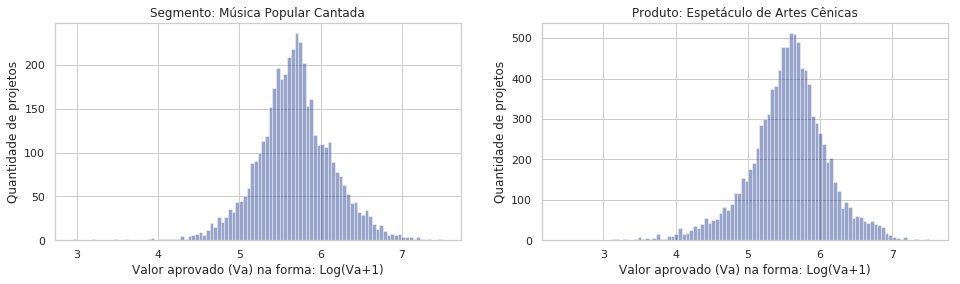

Segmento mean:5.66 std:0.45
Produto  mean:5.40 std:0.63


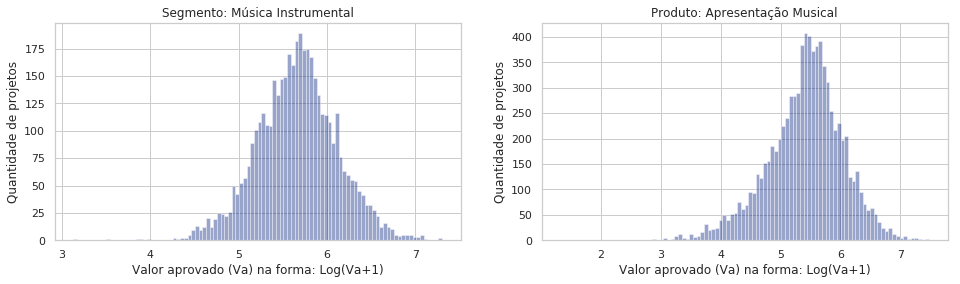

Segmento mean:5.80 std:0.53
Produto  mean:5.18 std:0.39


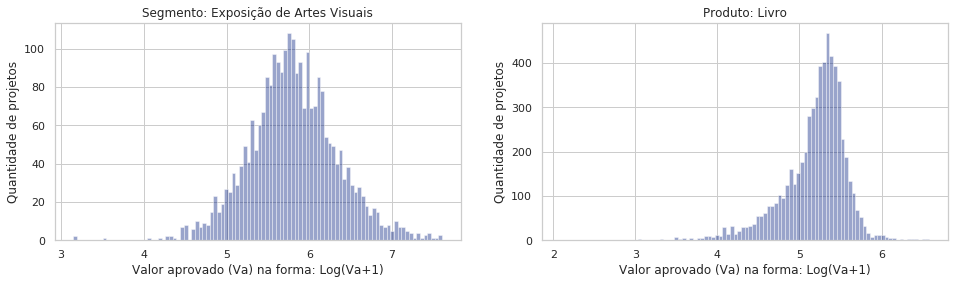

Segmento mean:5.61 std:0.49
Produto  mean:5.58 std:0.53


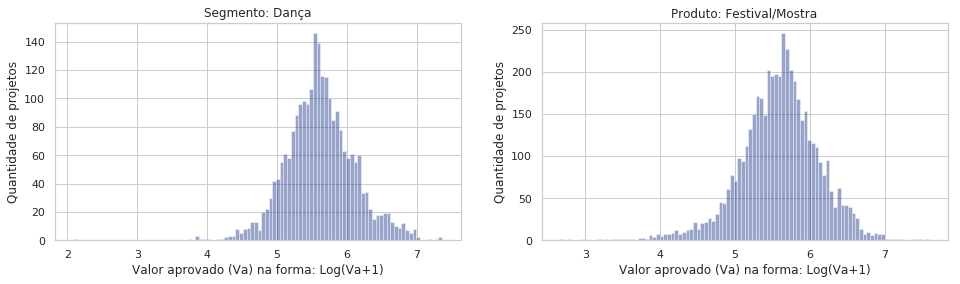

Segmento mean:5.70 std:0.52
Produto  mean:5.43 std:0.69


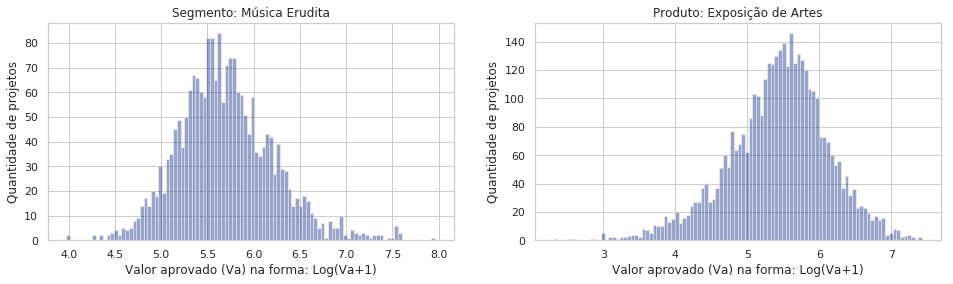

Segmento mean:5.40 std:0.28
Produto  mean:4.68 std:0.75


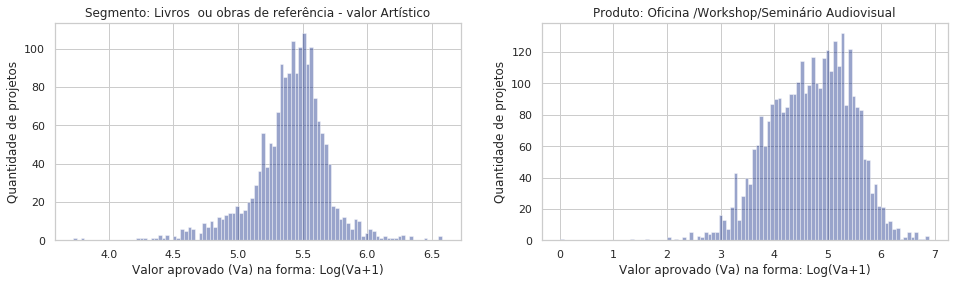

Segmento mean:5.38 std:0.32
Produto  mean:5.00 std:0.75


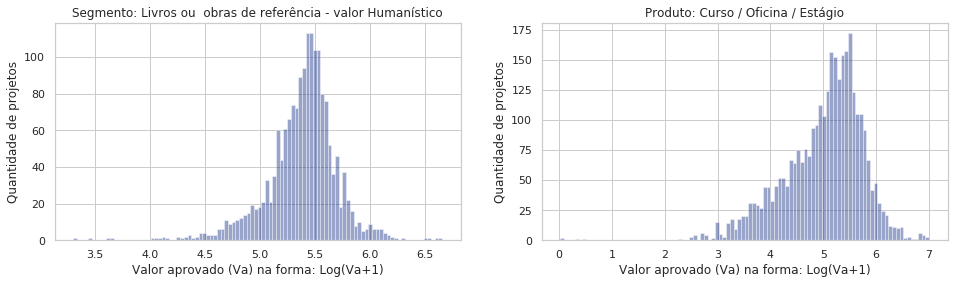

Segmento mean:5.73 std:0.42
Produto  mean:4.87 std:0.68


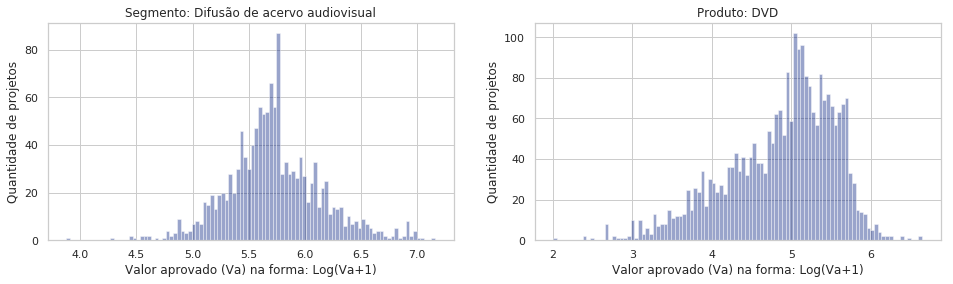

Segmento mean:5.56 std:0.32
Produto  mean:4.86 std:0.48


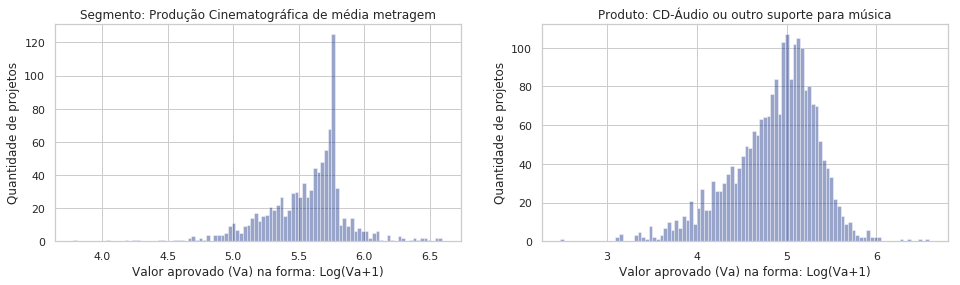

In [8]:
NUM_LINES = 10
projs_by_segment = projects_by_segment[projects_by_segment['VlTotalAprovado'] > 0]
projs_by_product = projects_by_product[projects_by_product['VlTotalAprovado'] > 0]

for line in range(NUM_LINES):
    segment = segments.iloc[line]
    projects_segm = np.log10(1 + projs_by_segment.loc[segment.name]['VlTotalAprovado'])
    product = products.iloc[line]
    projects_prod = np.log10(1 + projs_by_product.loc[product.name]['VlTotalAprovado'])
    
    print('Segmento mean:%.2lf std:%.2lf' % (projects_segm.mean(), projects_segm.std()))
    print('Produto  mean:%.2lf std:%.2lf' % (projects_prod.mean(), projects_prod.std()))
    
    sns.set(style='whitegrid', palette='dark')
    f, ax = plt.subplots(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    sns.distplot(projects_segm, bins=100, kde=False)
    plt.title('Segmento: ' + segment['Segmento'])
    plt.ylabel('Quantidade de projetos')
    plt.xlabel('Valor aprovado (Va) na forma: Log(Va+1)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.distplot(projects_prod, bins=100, kde=False)
    plt.title('Produto: ' + product['Produto'])
    plt.ylabel('Quantidade de projetos')
    plt.xlabel('Valor aprovado (Va) na forma: Log(Va+1)')
    plt.grid(True)
    plt.show()

---
## Resultados e Conclusões

As distribuições de valor aprovado, tanto por segmento quanto por produto cultural, têm uma cauda muito longa e, por isso, optou-se pela visualização do logaritmo das distribuições, que aumenta a distância entre amostras muito próximas e diminui a distância entre amostras muito distantes.

Em todos os grupos de projetos, agrupados tanto por segmento quanto por produto cultural, existem muitos projetos com um valor aprovado igual a zero, que fogem totalmente ao padrão de distribuição. Possivelmente tais projetos ainda não foram aprovados e não estão nas fases de execução ou análise de resultados. Portanto, foi realizada a análise das distribuições com e sem os projetos de valor aprovado igual a zero.

Os histogramas mostram que o logaritmo de todas as distribuições tendem a se comportar como uma Gaussiana, contudo, as distribuições agrupadas por produto cultural têm um desvio padrão consistentemente maior que as  distribuições agrupadas por segmento. Tal característica significa que os projetos de um mesmo segmento tendem a ter seus valores aprovados mais próximos que os projetos de um mesmo produto cultural.

A análise comparativa realizada foi baseada apenas no valor total aprovado dos projetos, uma melhoria ao estudo, seria a análise comparativa utilizando outras features de projetos.